In [11]:
import  tensorflow as tf

In [12]:
tf.version

<module 'tensorflow._api.v2.version' from 'C:\\Users\\computer_user\\Anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>

In [17]:
#import MNIST dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
import keras
fm=keras.datasets.fashion_mnist
#load train and test dataset xtrain data ytrain label will be stored
(xtrain,ytrain),(xtest,ytest)=fm.load_data()
xtrain[0]#print first row data
ytrain[0]
#to see its image
xtrain.shape

4423680/4422102 [==============================] - 4s 1us/step


(60000, 28, 28)

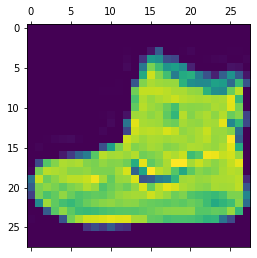

In [18]:
plt.matshow(xtrain[0])


In [19]:
#preprocessing by normalize
xtrain=xtrain/255
xtest=xtest/255



In [34]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation
model=Sequential()
#covert input to single dimension
model.add(Flatten(input_shape=[28,28]))#vector conversion from matrix
model.add(Dense(200,activation='relu'))#pass from one to next hidden layer 100 data/200 data from input neuron with 10 data and pass to hidden layer 10X10
model.add(Dense(200,activation='relu'))#first give one hidden then add this to check accuracy
model.add(Dense(10,activation='softmax'))#ouput is 0 to 9 softmax for output Relu for hidden layer
model.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                2010      
Total params: 199,210
Trainable params: 199,210
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=15)#more iteration less loss more accuracy


Epoch 1/15
60000/60000 [==============================] - 8s 137us/step - loss: 0.4795 - accuracy: 0.8268
Epoch 2/15
60000/60000 [==============================] - 9s 155us/step - loss: 0.3608 - accuracy: 0.8676
Epoch 3/15
60000/60000 [==============================] - 9s 156us/step - loss: 0.3214 - accuracy: 0.8816
Epoch 4/15
60000/60000 [==============================] - 10s 162us/step - loss: 0.2974 - accuracy: 0.8890
Epoch 5/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.2792 - accuracy: 0.8954
Epoch 6/15
60000/60000 [==============================] - 9s 147us/step - loss: 0.2665 - accuracy: 0.9003
Epoch 7/15
60000/60000 [==============================] - 11s 176us/step - loss: 0.2516 - accuracy: 0.9047
Epoch 8/15
60000/60000 [==============================] - 10s 163us/step - loss: 0.2412 - accuracy: 0.9077
Epoch 9/15
60000/60000 [==============================] - 10s 161us/step - loss: 0.2314 - accuracy: 0.9121
Epoch 10/15
60000/60000 [=================

In [36]:
loss,acc=model.evaluate(xtest,ytest)
print(loss)
print(acc) #loss+accuracy=100%

10000/10000 [==============================] - 1s 55us/step
0.3864164087235928
0.881600022315979


6

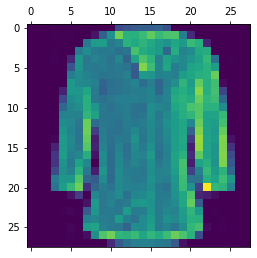

In [37]:
import numpy as np
plt.matshow(xtest[4])#shirts
yp=model.predict(xtest)
np.argmax(yp[4])

In [38]:
label=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal", "Shirt","Sneaker","Bag","Ankle boot"]
label[np.argmax(yp[0])]

'Ankle boot'